In [23]:
import tensorflow as tf
import cv2

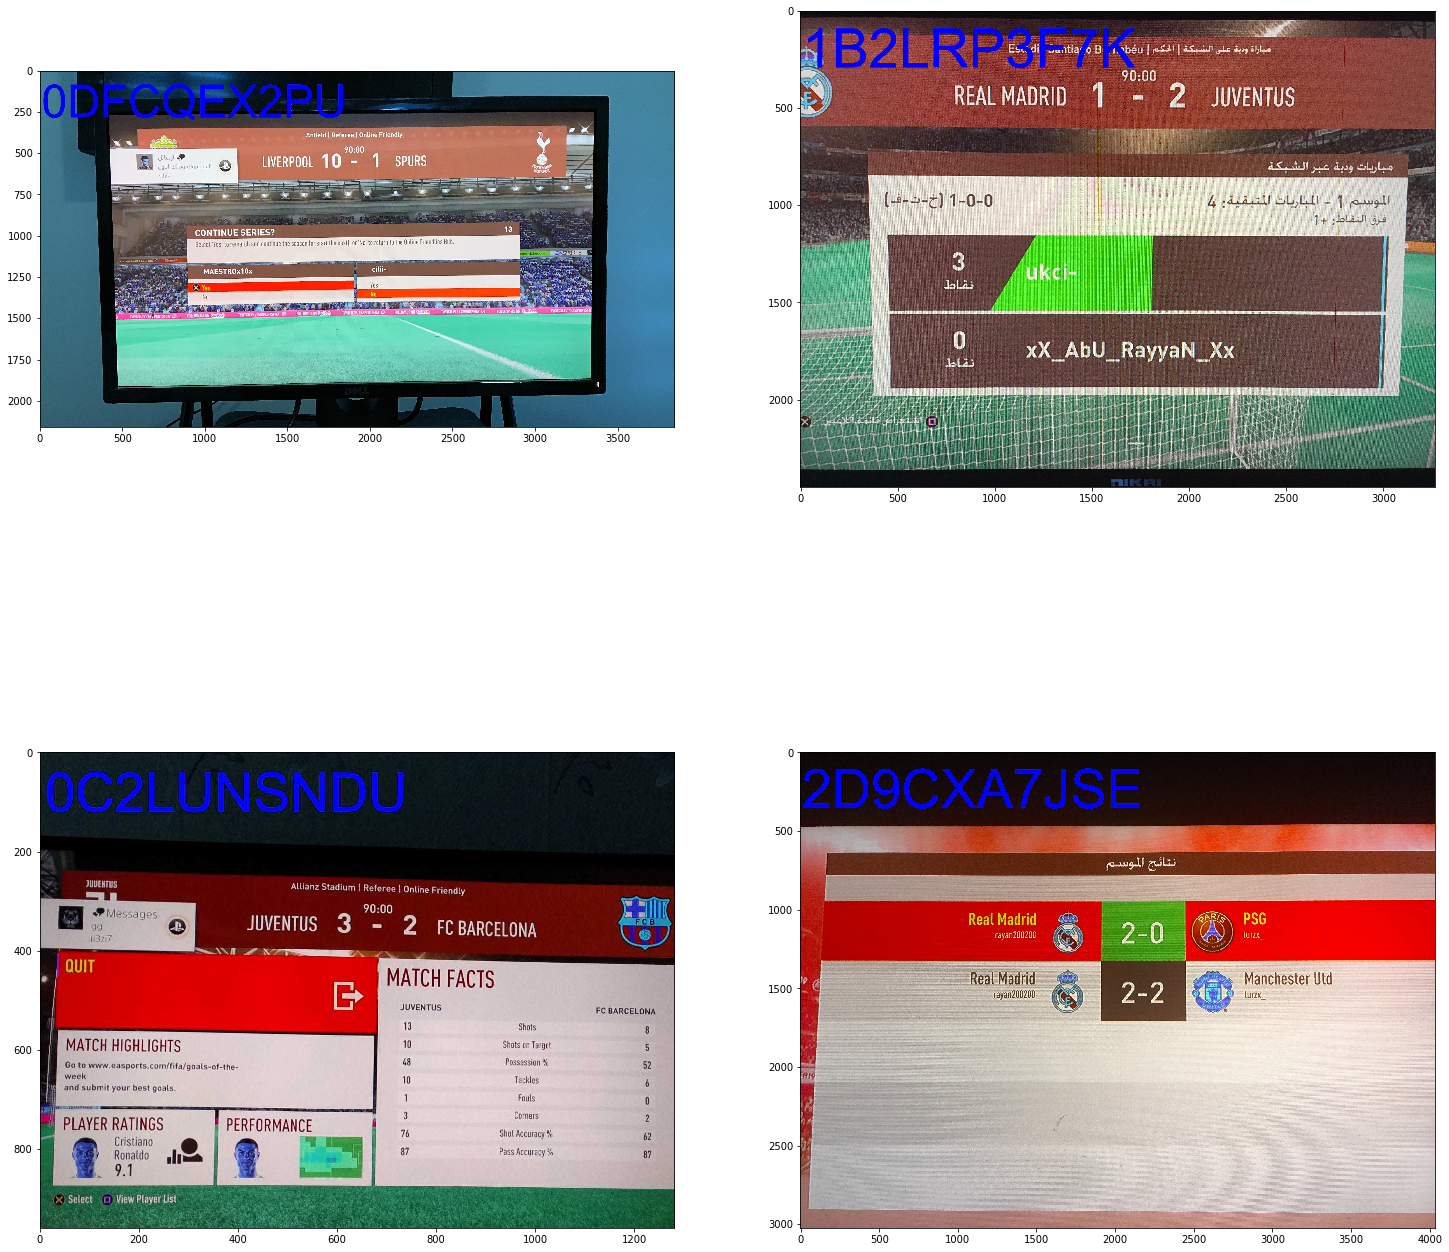

In [27]:
img_1 = cv2.imread('cnn/train/screen_info/0DFCQEX2PU.jpg')
img_2 = cv2.imread('cnn/train/screen_matches/1B2LRP3F7K.jpg')
img_3 = cv2.imread('cnn/train/screen_meta/0C2LUNSNDU.jpg')
img_4 = cv2.imread('cnn/train/screen_score/2D9CXA7JSE.jpg')

fig = plt.figure(figsize=(25, 25))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img_1)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(img_2)
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(img_3)
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(img_4)

In [16]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=.2,
    height_shift_range=.2,
    shear_range=.2,
    zoom_range=.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    'cnn/train/',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)
validation_generator = validation_datagen.flow_from_directory(
    'cnn/validation/',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 95 images belonging to 8 classes.
Found 87 images belonging to 8 classes.


In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation=tf.nn.relu, input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(8, activation=tf.nn.softmax)
]) 

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['acc'])

history = model.fit_generator(train_generator, 
                              epochs=10, 
                              steps_per_epoch=10, 
                              validation_data=validation_generator,
                              validation_steps=5,
                              verbose=1)

Epoch 1/10
10/10 [==============================] - 56s - loss: 2.3652 - acc: 0.1799 - val_loss: 2.0331 - val_acc: 0.1494
Epoch 2/10
10/10 [==============================] - 32s - loss: 2.0052 - acc: 0.2266 - val_loss: 1.8576 - val_acc: 0.2644
Epoch 3/10
10/10 [==============================] - 36s - loss: 1.8564 - acc: 0.3377 - val_loss: 1.5700 - val_acc: 0.4713
Epoch 4/10
10/10 [==============================] - 36s - loss: 1.5604 - acc: 0.4618 - val_loss: 1.4404 - val_acc: 0.5057
Epoch 5/10
10/10 [==============================] - 32s - loss: 1.2802 - acc: 0.5447 - val_loss: 1.4755 - val_acc: 0.5287
Epoch 6/10
10/10 [==============================] - 38s - loss: 1.0109 - acc: 0.6432 - val_loss: 1.2760 - val_acc: 0.5517
Epoch 7/10
10/10 [==============================] - 34s - loss: 0.8830 - acc: 0.6648 - val_loss: 1.5068 - val_acc: 0.5517
Epoch 8/10
10/10 [==============================] - 35s - loss: 0.9633 - acc: 0.6417 - val_loss: 1.2686 - val_acc: 0.5862
Epoch 9/10
10/10 [======

In [19]:
train_generator.class_indices

{'chats': 0,
 'clutters': 1,
 'screen_info': 2,
 'screen_matches': 3,
 'screen_meta': 4,
 'screen_other': 5,
 'screen_score': 6,
 'screen_skewed': 7}

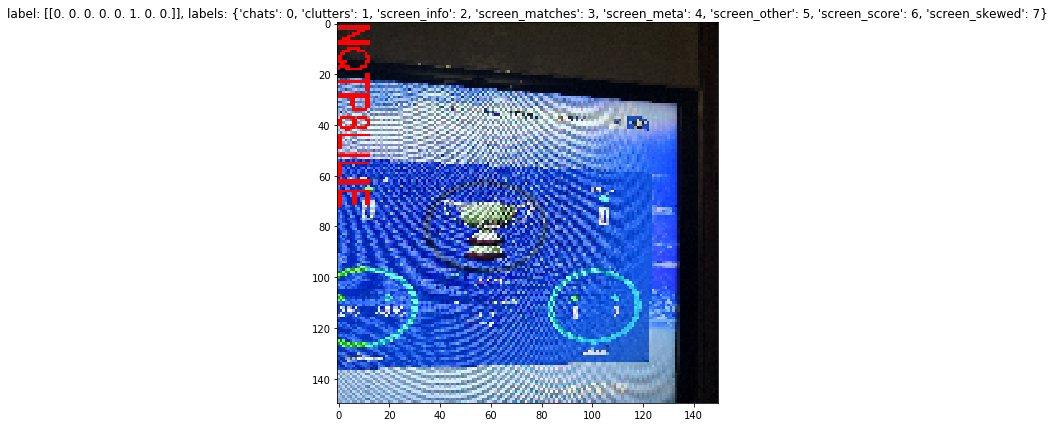

In [20]:
import numpy as np


img = tf.keras.preprocessing.image.load_img('data/NQTP8LILIE.jpg', target_size=(150, 150, 3))

x = np.expand_dims(tf.keras.preprocessing.image.img_to_array(img), axis=0)
X = np.vstack([x])

label = model.predict(X)
plt.figure(figsize=(7, 7))
plt.title(f'label: {label}, labels: {train_generator.class_indices}')
plt.imshow(tf.keras.preprocessing.image.img_to_array(img)/255)

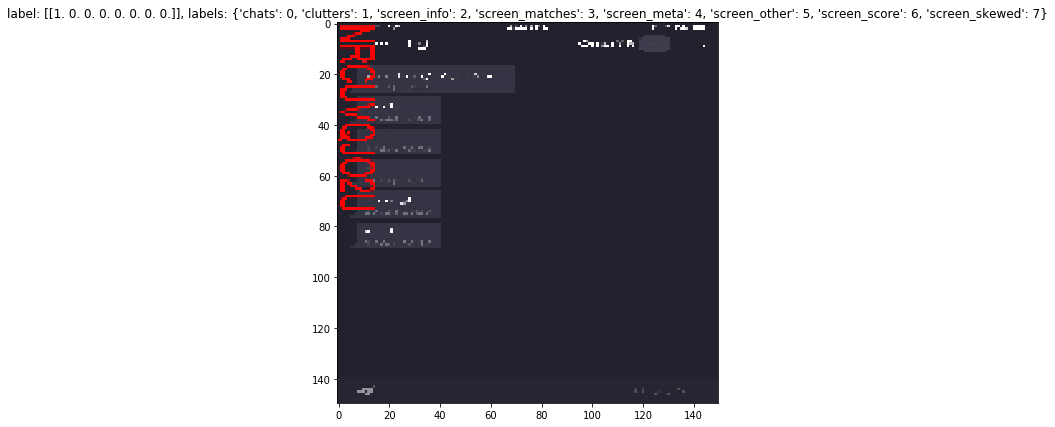

In [21]:
import numpy as np


img = tf.keras.preprocessing.image.load_img('data/NRCUVQJO2U.jpg', target_size=(150, 150, 3))

x = np.expand_dims(tf.keras.preprocessing.image.img_to_array(img), axis=0)
X = np.vstack([x])

label = model.predict(X)
plt.figure(figsize=(7, 7))
plt.title(f'label: {label}, labels: {train_generator.class_indices}')
plt.imshow(tf.keras.preprocessing.image.img_to_array(img)/255)

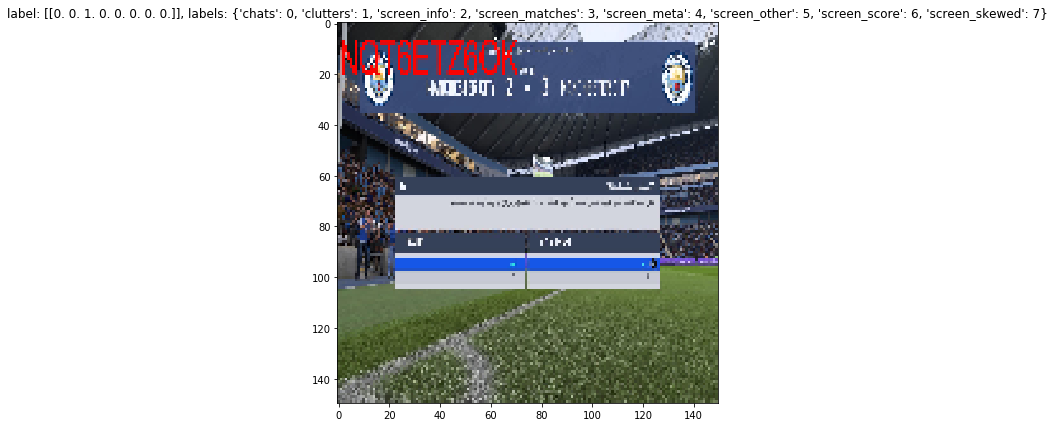

In [22]:
import numpy as np


img = tf.keras.preprocessing.image.load_img('data/NQT6ETZ6OK.jpg', target_size=(150, 150, 3))

x = np.expand_dims(tf.keras.preprocessing.image.img_to_array(img), axis=0)
X = np.vstack([x])

label = model.predict(X)
plt.figure(figsize=(7, 7))
plt.title(f'label: {label}, labels: {train_generator.class_indices}')
plt.imshow(tf.keras.preprocessing.image.img_to_array(img)/255)

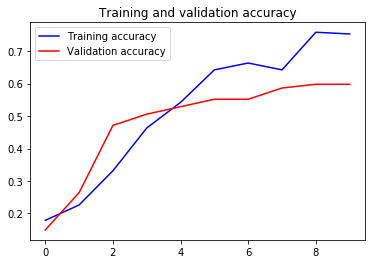

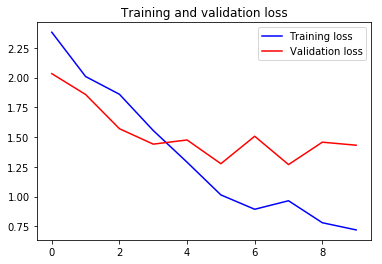

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline


acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')

plt.legend()